In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
temp_df = pd.read_csv('pokemon.csv')

In [3]:
temp_df.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
temp_df.type1.nunique()

18

In [5]:
temp_df.loc[(temp_df['speed'] > 120) & (temp_df['sp_attack'] > 100)].head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
17,"['Keen Eye', 'Tangled Feet', 'Big Pecks']",0.50,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,...,50.0,18,135,80,121,normal,flying,39.5,1,0
64,"['Synchronize', 'Inner Focus', 'Magic Guard']",2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,75.4,65,175,105,150,psychic,NaN,48.0,1,0
93,['Cursed Body'],0.25,2.0,1.0,1.0,0.5,0.0,1.0,1.0,2.0,...,50.0,94,170,95,130,ghost,poison,40.5,1,0
134,"['Volt Absorb', 'Quick Feet']",1.00,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,88.1,135,110,95,130,electric,NaN,24.5,1,0
149,"['Pressure', 'Unnerve']",2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1


In [6]:
temp_df.capture_rate

0       45
1       45
2       45
3       45
4       45
      ... 
796     25
797    255
798     15
799      3
800      3
Name: capture_rate, Length: 801, dtype: object

In [7]:
temp_df.shape

(801, 41)

In [8]:
temp_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

## Cleaning

In [9]:
cols = [
    'abilities', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense',
    'experience_growth', 'height_m', 'hp', 'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed',
    'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'
]

In [10]:
df = temp_df[cols].copy()

In [11]:
df.head()

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [12]:
df.shape

(801, 22)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   attack             801 non-null    int64  
 2   base_egg_steps     801 non-null    int64  
 3   base_happiness     801 non-null    int64  
 4   base_total         801 non-null    int64  
 5   capture_rate       801 non-null    object 
 6   classfication      801 non-null    object 
 7   defense            801 non-null    int64  
 8   experience_growth  801 non-null    int64  
 9   height_m           781 non-null    float64
 10  hp                 801 non-null    int64  
 11  name               801 non-null    object 
 12  percentage_male    703 non-null    float64
 13  pokedex_number     801 non-null    int64  
 14  sp_attack          801 non-null    int64  
 15  sp_defense         801 non-null    int64  
 16  speed              801 non

In [14]:
df.capture_rate = pd.to_numeric(df['capture_rate'], errors='coerce')

In [15]:
df.describe()

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,800.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,77.857678,7191.011236,65.362047,428.377029,98.761250,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,32.158820,6558.220422,19.598948,119.203577,76.257825,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,5.000000,1280.000000,0.000000,180.000000,3.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,55.000000,5120.000000,70.000000,320.000000,45.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,75.000000,5120.000000,70.000000,435.000000,60.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,100.000000,6400.000000,70.000000,505.000000,170.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,185.000000,30720.000000,140.000000,780.000000,255.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [16]:
df.loc[df['hp'] == 1]

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
291,['Wonder Guard'],90,3840,70,236,45.0,Shed Pokémon,45,600000,0.8,...,NaN,292,30,30,40,bug,ghost,1.2,3,0


###### Shedinja is the only hero in the whole game who has 1 hp. He is immune to all attacks but can be defeated easily if the opponent has good special moves and he is also hard to deal with if you don't have good attacks.

In [17]:
df.loc[df['base_happiness'] == 0]

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
149,"['Pressure', 'Unnerve']",150,30720,0,780,3.0,Genetic Pokémon,70,1250000,2.0,...,NaN,150,194,120,140,psychic,NaN,122.0,1,1
248,"['Pressure', 'Multiscale']",90,30720,0,680,3.0,Diving Pokémon,130,1250000,5.2,...,NaN,249,90,154,110,psychic,flying,216.0,2,1
249,"['Pressure', 'Regenerator']",130,30720,0,680,3.0,Rainbow Pokémon,90,1250000,3.8,...,NaN,250,110,154,90,fire,flying,199.0,2,1
381,['Drizzle'],150,30720,0,770,3.0,Sea Basin Pokémon,90,1250000,4.5,...,NaN,382,180,160,90,water,NaN,352.0,3,1
382,['Drought'],180,30720,0,770,3.0,Continent Pokémon,160,1250000,3.5,...,NaN,383,150,90,90,ground,NaN,950.0,3,1
383,['Air Lock'],180,30720,0,780,45.0,Sky High Pokémon,100,1250000,7.0,...,NaN,384,180,100,115,dragon,flying,206.5,3,1
385,['Pressure'],95,30720,0,600,3.0,DNA Pokémon,90,1250000,1.7,...,NaN,386,95,90,180,psychic,NaN,60.8,3,1
426,"['Run Away', 'Klutz', 'Limber']",66,5120,0,350,190.0,Rabbit Pokémon,44,1000000,0.4,...,50.0,427,44,56,85,normal,NaN,5.5,4,0
482,"['Pressure', 'Telepathy']",120,30720,0,680,3.0,Temporal Pokémon,120,1250000,5.4,...,NaN,483,150,100,90,steel,dragon,683.0,4,1
483,"['Pressure', 'Telepathy']",120,30720,0,680,3.0,Spatial Pokémon,100,1250000,4.2,...,NaN,484,150,120,100,water,dragon,336.0,4,1


## Analysis and visulisation

In [18]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 6)  # basic formatting for all charts
matplotlib.rcParams['figure.facecolor'] = 'xkcd:pale pink'
matplotlib.rcParams['font.size'] = 12

## Legendary status of pokemon

In [19]:
df.is_legendary

0      0
1      0
2      0
3      0
4      0
      ..
796    1
797    1
798    1
799    1
800    1
Name: is_legendary, Length: 801, dtype: int64

In [20]:
df['legendary_status'] = df['is_legendary'].map({0: 'Non-Legendary', 1: 'Legendary'})  # Making another column to show the legendary status of the pokemon

In [21]:
legendary = df.legendary_status.value_counts()
legendary

Non-Legendary    731
Legendary         70
Name: legendary_status, dtype: int64

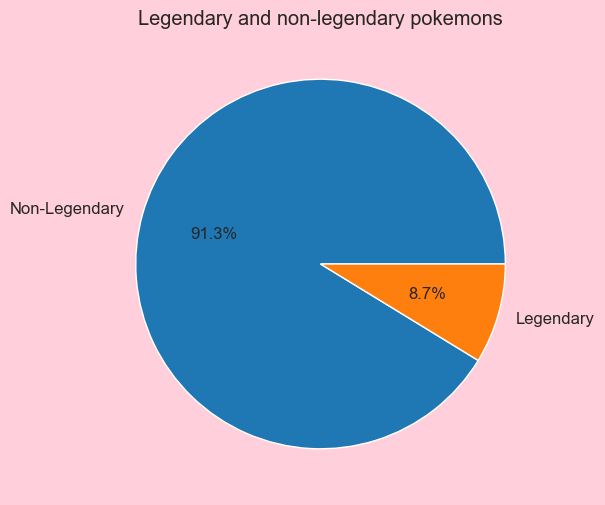

In [22]:
plt.title('Legendary and non-legendary pokemons')
plt.pie(legendary, labels=legendary.index, autopct='%.1f%%');

Only 8.7 percent pokemon's are legendary. Legendary Pokémon are a group of incredibly rare and often very powerful Pokémon, generally featured prominently in the legends and myths of the Pokémon world. They are typically hard to get and are usually restricted to one or two of each species in each game they’re available in.

non-legendary Pokémon are more common and can be found more easily in the game. They may not have the same level of power or rarity as Legendary Pokémon, but there are still many non-legendary Pokémon that are strong and have unique abilities.

## Generation

In [23]:
df.generation

0      1
1      1
2      1
3      1
4      1
      ..
796    7
797    7
798    7
799    7
800    7
Name: generation, Length: 801, dtype: int64

In [24]:
df['gen'] = df['generation'].map({1: 'first_gen', 2: 'sec_gen', 3: 'third_gen', 4: 'fourth_gen', 5: 'fifth_gen', 6: 'sixth_gen', 7: 'seventh_gen'})   # creating another column for generation

In [25]:
gen_count = df.gen.value_counts()
gen_count

fifth_gen      156
first_gen      151
third_gen      135
fourth_gen     107
sec_gen        100
seventh_gen     80
sixth_gen       72
Name: gen, dtype: int64

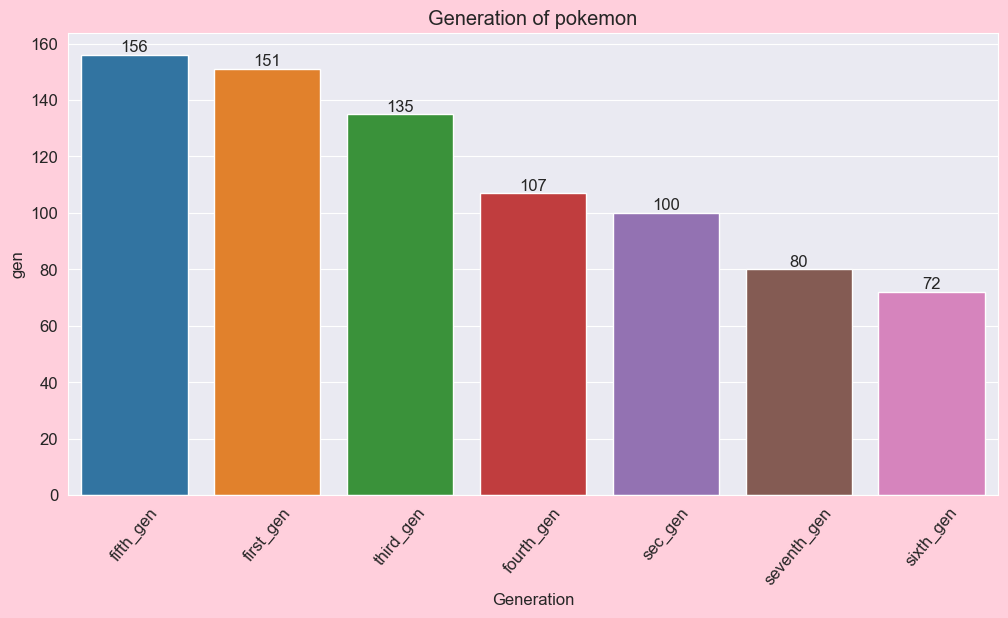

In [26]:
plt.title('Generation of pokemon')
plt.xticks(rotation=50)
plt.xlabel('Generation')
plt.ylabel(False)
ax = sns.barplot(x=gen_count.index, y=gen_count);
for label in ax.containers:
    ax.bar_label(label)

In fifth generation there were highest Pokemon's which is 156, and afetr that first generatio nhas the highest(151) Pokemon's afetr that the third generation(135) Pokemon's. In seixth generation there are least number of Pokemon's which is 72.

## Base happiness

In [27]:
df.base_happiness

0      70
1      70
2      70
3      70
4      70
       ..
796     0
797     0
798     0
799     0
800     0
Name: base_happiness, Length: 801, dtype: int64

In [28]:
count = df.base_happiness.value_counts()
count

70     667
35      69
0       36
100     14
140     10
90       5
Name: base_happiness, dtype: int64

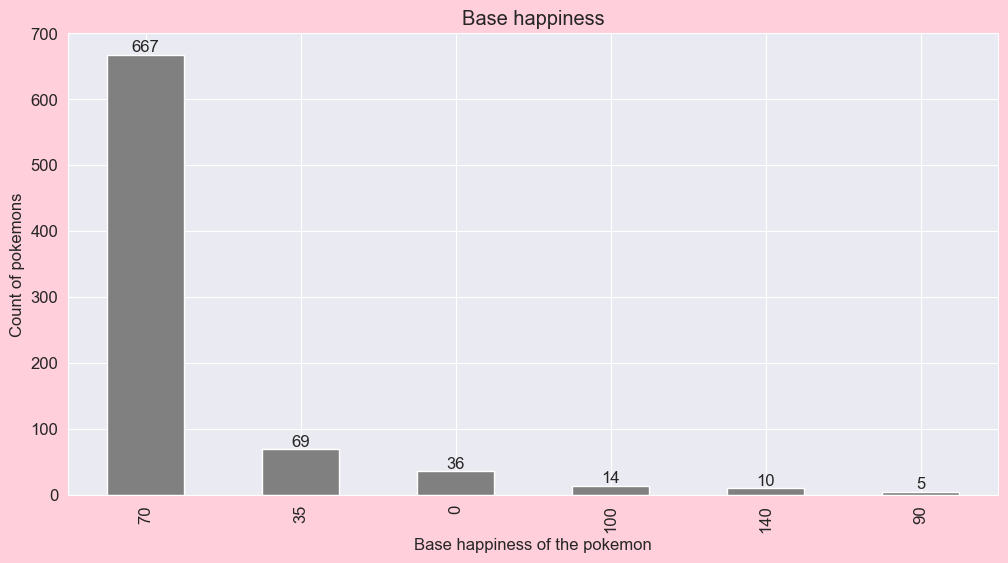

In [29]:
plt.title('Base happiness')
plt.ylabel('Count of pokemons')
plt.xlabel('Base happiness of the pokemon')
ax=count.plot.bar(color='grey');
for label in ax.containers:
    ax.bar_label(label)

Most of the Pokemon's have base happiness 70. Base happiness is the value to which a Pokémon’s friendship is set when it is caught, received from an event or NPC, or received from a trade with another player. Having high base happiness can have several benefits in the Pokémon games. For example, some Pokémon require high happiness to evolve, such as Togepi, Chansey, and Golbat. Additionally, the move Return becomes more powerful when a Pokémon has high happiness, while the move Frustration becomes more powerful when a Pokémon has low happiness.

## Capture rate of pokemons

In [30]:
cap = df.groupby('legendary_status')['capture_rate'].mean()
sort_cap = cap.sort_values(ascending=False)
sort_cap

legendary_status
Non-Legendary    106.506849
Legendary         17.985714
Name: capture_rate, dtype: float64

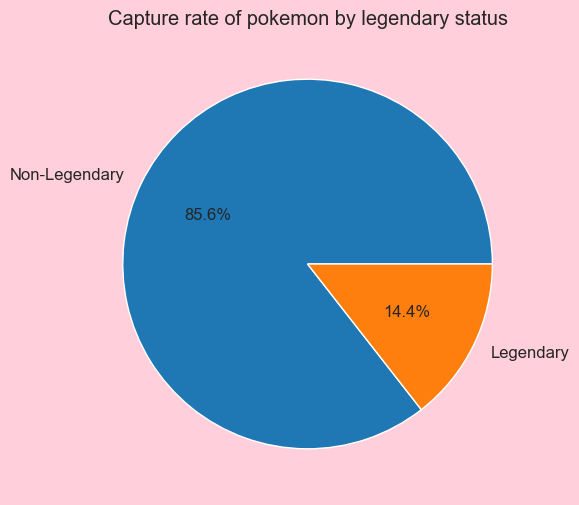

In [31]:
plt.title('Capture rate of pokemon by legendary status')
plt.pie(sort_cap, labels=sort_cap.index, autopct='%1.1f%%');

As expected the non-legendary Pokemon's has the highest capture rate which is 86 percent and the legendary Pokemon's have 14 percent of capture rate, which is preety good because they're legendary Pokemon's and it's actully a huge rate for legendary and they're also rare.

## Elements of pokemon

It seems like the non-legendary pokemon's have higher capture rate than the legendary one's but it's still 14.4 percent chance is a good amount of for the legendary pokemon.

In [32]:
stacked_data = df.pivot_table(index='type1', columns='legendary_status', values='name', aggfunc='count')
stacked_data

legendary_status,Legendary,Non-Legendary
type1,,
bug,3.0,69.0
dark,3.0,26.0
dragon,7.0,20.0
electric,5.0,34.0
fairy,1.0,17.0
fighting,NaN,28.0
fire,5.0,47.0
flying,1.0,2.0
ghost,1.0,26.0


<Figure size 1200x600 with 0 Axes>

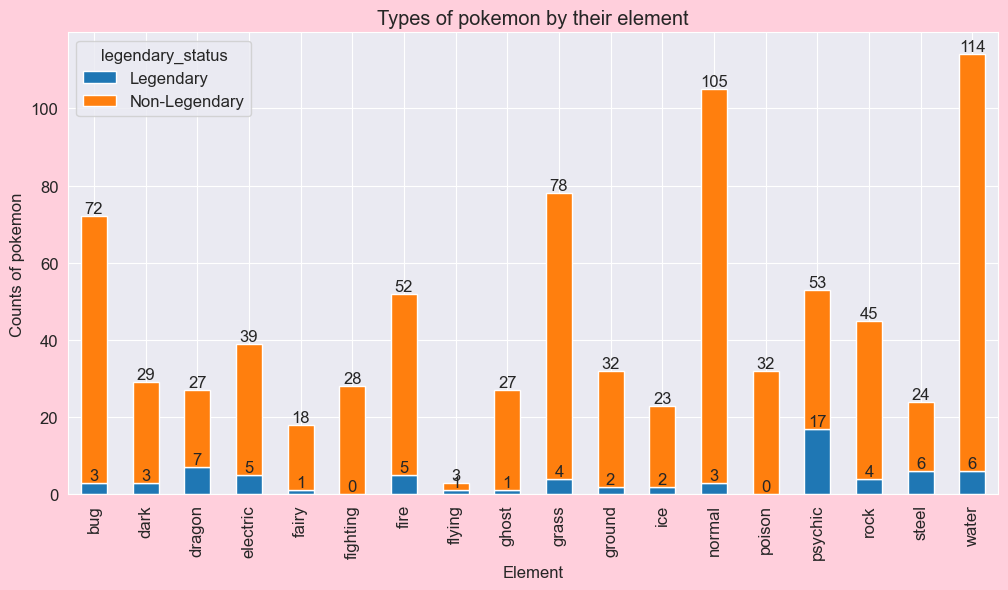

In [33]:
plt.clf()
ax=stacked_data.plot(kind='bar', stacked=True);
plt.title('Types of pokemon by their element')
plt.xlabel('Element')
plt.ylabel('Counts of pokemon')
for label in ax.containers:
    ax.bar_label(label)

Most of the legendary pokemons are of psychic element and poison is the only element which doesn't have any legendary pokemon.

In [34]:
df.type2.unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

In [35]:
count = df['type2'].value_counts()
count

flying      95
poison      34
ground      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: type2, dtype: int64

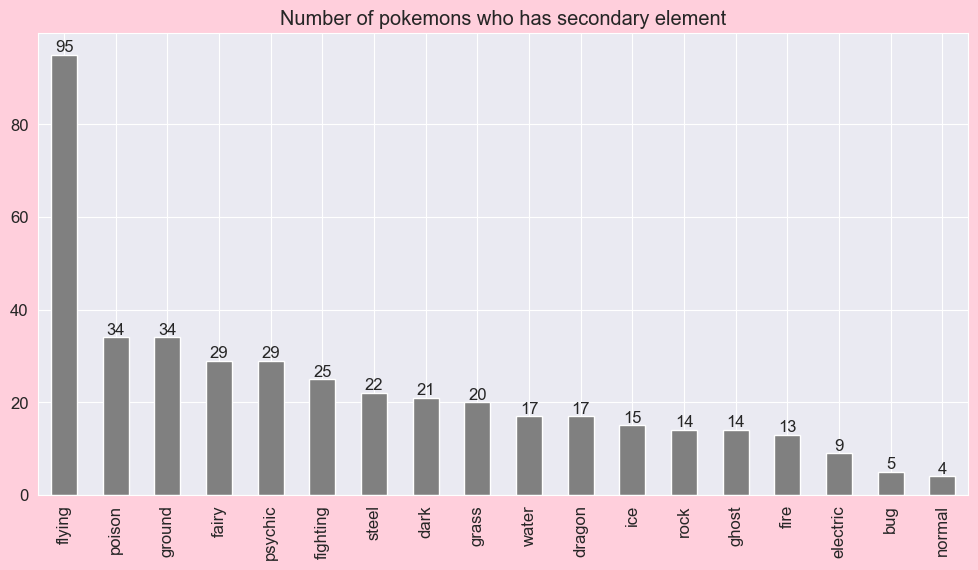

In [36]:
plt.title('Number of pokemons who has secondary element')
ax=count.plot(kind='bar', color='grey');
for label in ax.containers:
    ax.bar_label(label)

Most of the Pokemon have their secondary element flying and the least number of Pokemon's have their secondary element as normal.

## Pokemon's with high stats

In [37]:
spd = df.loc[(df['speed'] > 100) & (df['attack'] > 100)].head(5)  # Pokemon whose speed and attack is higher is higher than 100
spd

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,legendary_status,gen
14,"['Swarm', 'Sniper']",150,3840,70,495,45.0,Poison Bee Pokémon,40,1000000,1.0,...,15,80,145,bug,poison,29.5,1,0,Non-Legendary,first_gen
84,"['Run Away', 'Early Bird', 'Tangled Feet']",110,5120,70,470,45.0,Triple Bird Pokémon,70,1000000,1.8,...,60,60,110,normal,flying,85.2,1,0,Non-Legendary,first_gen
122,"['Swarm', 'Technician', 'Steadfast']",110,6400,70,500,45.0,Mantis Pokémon,80,1000000,1.5,...,55,80,105,bug,flying,56.0,1,0,Non-Legendary,first_gen
126,"['Hyper Cutter', 'Mold Breaker', 'Moxie']",155,6400,70,600,45.0,Stagbeetle Pokémon,120,1250000,1.5,...,65,90,105,bug,NaN,55.0,1,0,Non-Legendary,first_gen
141,"['Rock Head', 'Pressure', 'Unnerve']",135,8960,70,615,45.0,Fossil Pokémon,85,1250000,1.8,...,70,95,150,rock,flying,59.0,1,0,Non-Legendary,first_gen


<Figure size 1200x600 with 0 Axes>

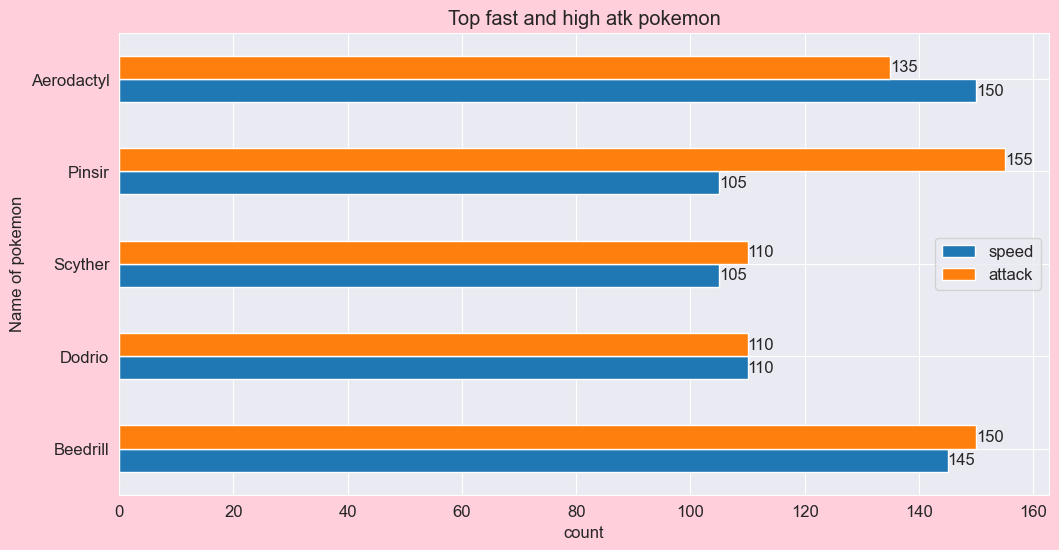

In [38]:
plt.clf()
ax=spd.plot(x='name', y=['speed', 'attack'], kind='barh');
plt.title('Top fast and high atk pokemon')
plt.xlabel('count')
plt.ylabel('Name of pokemon')
for label in ax.containers:
    ax.bar_label(label)

Speed is a very important stat for any Pokémon. It determines the order in which Pokémon can act in battle. The Pokémon with the highest speed stat will usually go first, unless affected by certain conditions such as Trick Room, Quick Claw, or Lagging Tail. Speed can also be modified by certain moves, abilities, and items that can increase or decrease a Pokémon’s speed. By going first in battle, a Pokémon has the advantage of being able to attack before its opponent, which can be crucial in defeating the opponent or setting up certain strategies.

###### In this chart we can see that Pinsir has highest speed and attack is also good but Beedrill and aerodactyl have high chance of cleaving and finishing the battle fast than the other Pokemon.

## Pokemon's and their stats

In [39]:
defense=df[['name', 'defense']]  # All the pokemon's and their defense
defense

,name,defense
0,Bulbasaur,49
1,Ivysaur,63
2,Venusaur,123
3,Charmander,43
4,Charmeleon,58
...,...,...
796,Celesteela,103
797,Kartana,131
798,Guzzlord,53
799,Necrozma,101


In [40]:
sort_def=defense.sort_values(by='defense', ascending=False).head(15)  # Top 15 pokemon's whose defense is higher than others
sort_def

,name,defense
305,Aggron,230
212,Shuckle,230
207,Steelix,230
376,Regirock,200
712,Avalugg,184
90,Cloyster,180
79,Slowbro,180
410,Bastiodon,168
94,Onix,160
382,Groudon,160


<Figure size 1200x600 with 0 Axes>

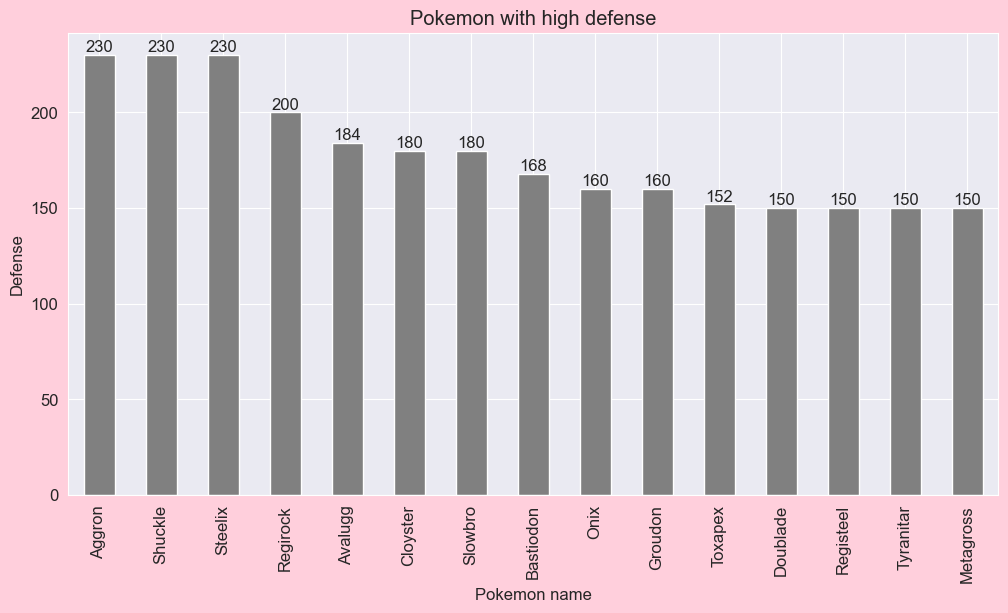

In [41]:
plt.clf()
ax=sort_def.plot(x='name', y='defense', kind='bar', color='grey', legend=False);
plt.xlabel('Pokemon name')
plt.ylabel('Defense')
plt.title('Pokemon with high defense')
for label in ax.containers:
    ax.bar_label(label)

Havinf tanks is good when you are lacking in speed and Aggron, Shuckle and Steelix has the highest phy. defence(230), which is highest in whole game.

In [42]:
count=df[['name', 'base_total']]
count

,name,base_total
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,625
3,Charmander,309
4,Charmeleon,405
...,...,...
796,Celesteela,570
797,Kartana,570
798,Guzzlord,570
799,Necrozma,600


In [43]:
base=count.sort_values(by='base_total',ascending=False).head(15)
base

,name,base_total
149,Mewtwo,780
383,Rayquaza,780
382,Groudon,770
381,Kyogre,770
492,Arceus,720
717,Zygarde,708
380,Latios,700
372,Salamence,700
247,Tyranitar,700
444,Garchomp,700


<Figure size 1200x600 with 0 Axes>

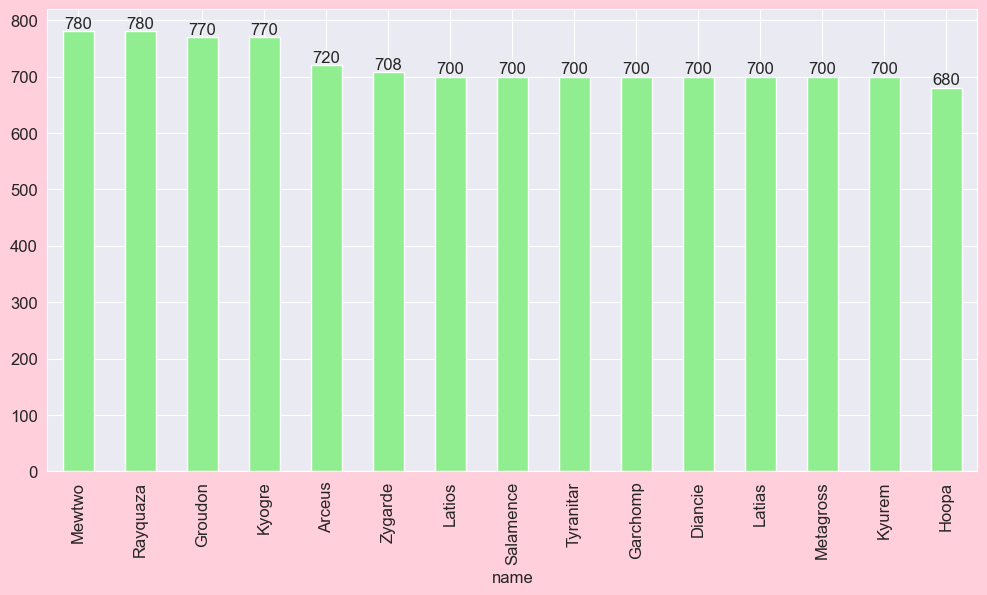

In [44]:
colors=['#90EE90'] * 15
plt.title('Pokemon with base total values')
plt.clf()
ax=base.plot(x='name', y='base_total', kind='bar', color=colors, legend=False);
for label in ax.containers:
    ax.bar_label(label)

Having high stats can provide several benefits to a Pokémon’s abilities in battle. These values determine factors such as damage dealt, damage received, and which Pokémon starts battle(Decided by speed of the pokemon) first. For example, a Pokémon with high Attack will cause more damage to the opponent while using a move, while a Pokémon with high Defense will resist more damage when hit by a move. Similarly, a Pokémon with high Special Attack will cause more damage while using a special move.

## Questions

#### What is the average base_total value for all Pokémon?

In [45]:
base_avg=df.base_total.mean().round(2)
print(f'The average base total for all the pokemon is {base_avg}')

The average base total for all the pokemon is 428.38


#### Which Pokémon has the highest attack value?

In [46]:
atk=df[['name', 'attack']]
atk

,name,attack
0,Bulbasaur,49
1,Ivysaur,62
2,Venusaur,100
3,Charmander,52
4,Charmeleon,64
...,...,...
796,Celesteela,101
797,Kartana,181
798,Guzzlord,101
799,Necrozma,107


In [47]:
highest_atk=atk.sort_values(by='attack',ascending=False).head(1)
highest_atk

,name,attack
213,Heracross,185


In [48]:
high_atk_name=highest_atk.name.iloc[0]  # To only get the name of the pokemon
high_atk_value=highest_atk.attack.iloc[0] # To only get the value
print(f'{high_atk_name} has the highest attack {high_atk_value}')

Heracross has the highest attack 185


#### Which Pokémon has the lowest defense value?

In [49]:
defense=df[['name', 'defense']]
defense

,name,defense
0,Bulbasaur,49
1,Ivysaur,63
2,Venusaur,123
3,Charmander,43
4,Charmeleon,58
...,...,...
796,Celesteela,103
797,Kartana,131
798,Guzzlord,53
799,Necrozma,101


In [50]:
sort_def=defense.sort_values(by='defense',ascending=True)
sort_def

,name,defense
439,Happiny,5
112,Chansey,5
241,Blissey,10
237,Smoochum,15
171,Pichu,15
...,...,...
712,Avalugg,184
376,Regirock,200
207,Steelix,230
212,Shuckle,230


In [51]:
lowest_def_name=sort_def.name.iloc[0]
lowest_def_value=sort_def.defense.iloc[0]
print(f'{lowest_def_name} has the lowest defense {lowest_def_value}')

Happiny has the lowest defense 5


#### What is the distribution of height_m values for all Pokémon?

In [52]:
height=df.height_m.value_counts()
height

0.6     70
0.5     60
0.4     59
1.0     57
0.3     53
1.2     49
0.8     43
1.5     43
0.7     37
1.1     36
0.9     32
1.3     29
1.4     28
1.6     25
1.7     23
2.0     21
1.8     21
0.2     17
1.9     13
2.1      8
2.2      6
0.1      5
2.5      5
3.0      3
2.4      3
2.3      3
4.0      2
3.8      2
2.7      2
4.5      2
3.5      2
9.2      2
3.2      2
8.8      1
3.4      1
3.9      1
5.0      1
5.8      1
2.9      1
2.8      1
2.6      1
3.7      1
3.3      1
4.2      1
5.4      1
6.5      1
7.0      1
6.2      1
14.5     1
5.2      1
5.5      1
Name: height_m, dtype: int64

Text(0.5, 1.0, 'Distribution of Height Values for All Pokémon')

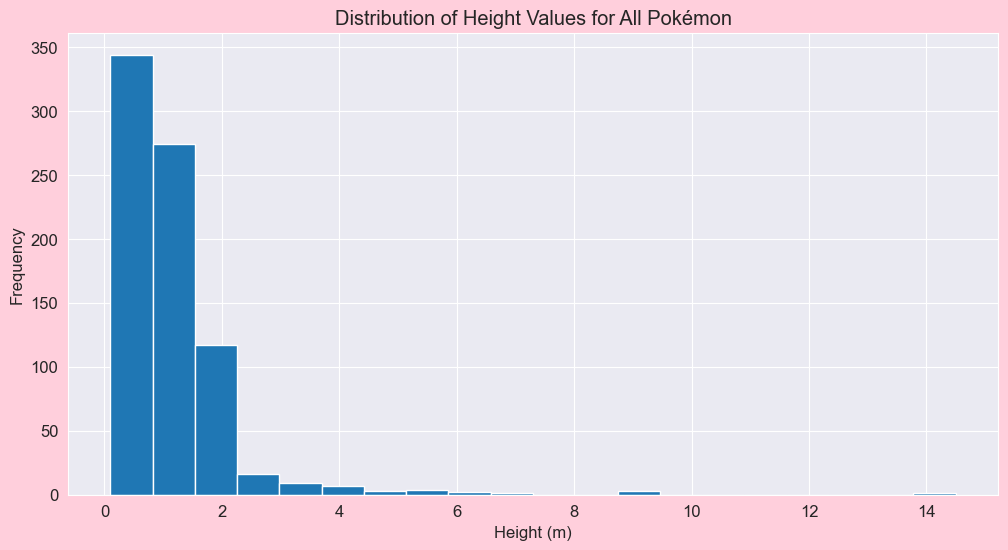

In [53]:
plt.clf()
plt.hist(df['height_m'], bins=20);
plt.xlabel('Height (m)')
plt.ylabel('Frequency')
plt.title('Distribution of Height Values for All Pokémon')

#### What pokemons have same type1 and type2?

In [54]:
temp=df[['name', 'type1', 'type2']]
temp

,name,type1,type2
0,Bulbasaur,grass,poison
1,Ivysaur,grass,poison
2,Venusaur,grass,poison
3,Charmander,fire,NaN
4,Charmeleon,fire,NaN
...,...,...,...
796,Celesteela,steel,flying
797,Kartana,grass,steel
798,Guzzlord,dark,dragon
799,Necrozma,psychic,NaN


In [55]:
cond_df=temp.loc[temp['type1'] == temp['type2']]
cond_df

,name,type1,type2
25,Raichu,electric,electric
49,Diglett,ground,ground
50,Dugtrio,ground,ground
87,Grimer,poison,poison
88,Muk,poison,poison
491,Shaymin,grass,grass
554,Darmanitan,fire,fire


In [56]:
total=(len(cond_df) * 100 / len(df))
print(f'Only {round(total, 2)} percent pokemon have both same element type')

Only 0.87 percent pokemon have both same element type


#### What are the percentage of female pokemons?

In [57]:
df['percentage_female']=100 - df.percentage_male
df.percentage_female

0      11.9
1      11.9
2      11.9
3      11.9
4      11.9
       ... 
796     NaN
797     NaN
798     NaN
799     NaN
800     NaN
Name: percentage_female, Length: 801, dtype: float64

In [58]:
male_percentage=df.percentage_male.mean().round(2)
female_percentage=df.percentage_female.mean().round(2)

In [59]:
data=pd.DataFrame({'Gender': ['Male', 'Female'], 'Percentage': [male_percentage, female_percentage]})
data

,Gender,Percentage
0,Male,55.16
1,Female,44.84


Text(0, 0.5, '')

<Figure size 1200x600 with 0 Axes>

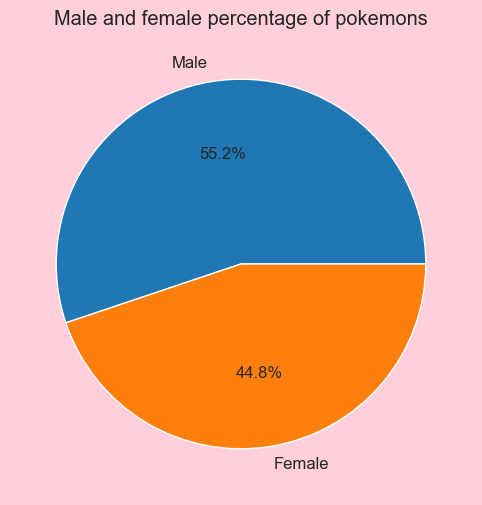

In [60]:
plt.clf()
data.plot.pie(x='Gender', y='Percentage', labels=data['Gender'], autopct='%1.1f%%', legend=False);
plt.title('Male and female percentage of pokemons')
plt.ylabel('')

In [61]:
print(f'The percentage of pokemons are {female_percentage}')

The percentage of pokemons are 44.84


##### How many legendary pokemon are there in each generation?

In [62]:
test_df=df.pivot_table(index='gen', columns='legendary_status', values='name', aggfunc='count')
test_df

legendary_status,Legendary,Non-Legendary
gen,,
fifth_gen,13,143
first_gen,5,146
fourth_gen,13,94
sec_gen,6,94
seventh_gen,17,63
sixth_gen,6,66
third_gen,10,125


<Figure size 1200x600 with 0 Axes>

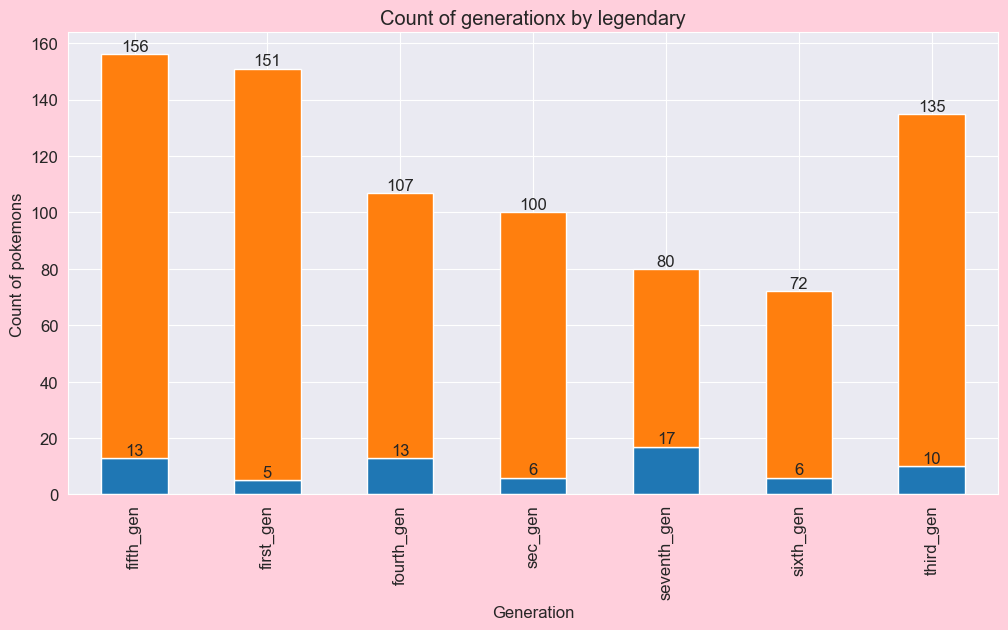

In [63]:
plt.clf()
ax=test_df.plot(stacked=True, kind='bar', legend=False);
plt.title('Count of generationx by legendary')
plt.xlabel('Generation')
plt.ylabel('Count of pokemons')
for label in ax.containers:
    ax.bar_label(label)

#### What are the most common abilities?

In [64]:
exploded = df.explode('abilities')
exploded

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,legendary_status,gen,percentage_female
0,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45.0,Seed Pokémon,49,1059860,0.7,...,65,45,grass,poison,6.9,1,0,Non-Legendary,first_gen,11.9
1,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45.0,Seed Pokémon,63,1059860,1.0,...,80,60,grass,poison,13.0,1,0,Non-Legendary,first_gen,11.9
2,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45.0,Seed Pokémon,123,1059860,2.0,...,120,80,grass,poison,100.0,1,0,Non-Legendary,first_gen,11.9
3,"['Blaze', 'Solar Power']",52,5120,70,309,45.0,Lizard Pokémon,43,1059860,0.6,...,50,65,fire,NaN,8.5,1,0,Non-Legendary,first_gen,11.9
4,"['Blaze', 'Solar Power']",64,5120,70,405,45.0,Flame Pokémon,58,1059860,1.1,...,65,80,fire,NaN,19.0,1,0,Non-Legendary,first_gen,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],101,30720,0,570,25.0,Launch Pokémon,103,1250000,9.2,...,101,61,steel,flying,999.9,7,1,Legendary,seventh_gen,NaN
797,['Beast Boost'],181,30720,0,570,255.0,Drawn Sword Pokémon,131,1250000,0.3,...,31,109,grass,steel,0.1,7,1,Legendary,seventh_gen,NaN
798,['Beast Boost'],101,30720,0,570,15.0,Junkivore Pokémon,53,1250000,5.5,...,53,43,dark,dragon,888.0,7,1,Legendary,seventh_gen,NaN
799,['Prism Armor'],107,30720,0,600,3.0,Prism Pokémon,101,1250000,2.4,...,89,79,psychic,NaN,230.0,7,1,Legendary,seventh_gen,NaN


In [65]:
counts = exploded['abilities'].value_counts()
ability=counts.head(15)
ability

['Levitate']                                   29
['Beast Boost']                                 7
['Shed Skin']                                   5
['Justified']                                   4
['Poison Point', 'Rivalry', 'Hustle']           4
['Keen Eye', 'Tangled Feet', 'Big Pecks']       4
['Clear Body', 'Light Metal']                   4
['Torrent', 'Sheer Force']                      3
['Blaze', 'Flash Fire']                         3
['Overgrow', 'Leaf Guard']                      3
['Thick Fat', 'Ice Body', 'Oblivious']          3
['Swift Swim', 'Water Veil']                    3
['Rivalry', 'Mold Breaker', 'Unnerve']          3
['Overgrow', 'Chlorophyll']                     3
['Flash Fire', 'Flame Body', 'Infiltrator']     3
Name: abilities, dtype: int64

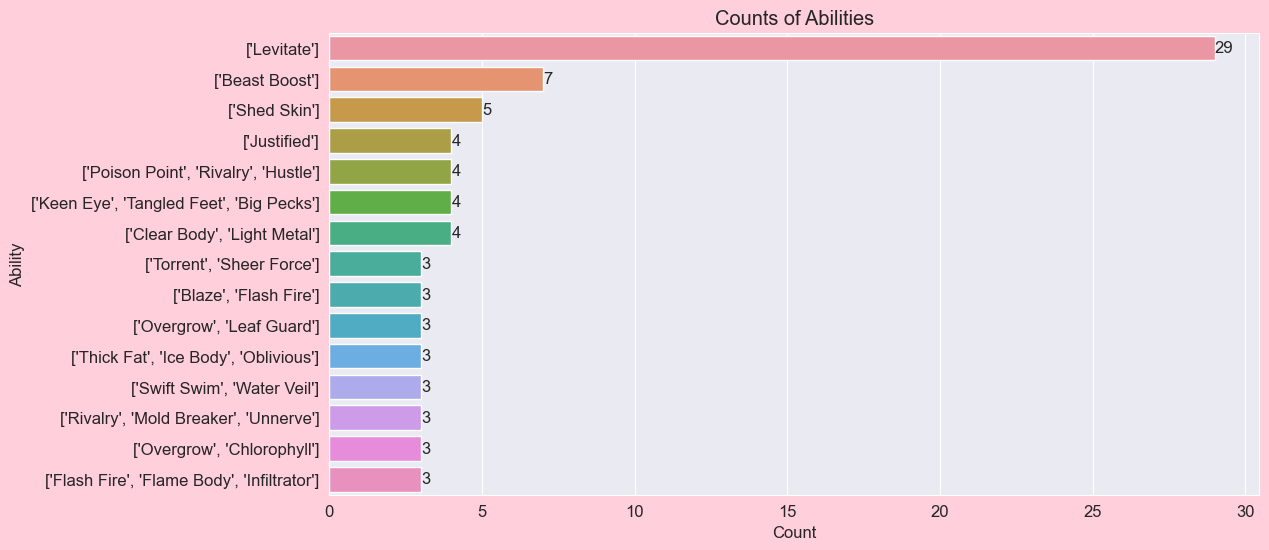

In [66]:
plt.clf()
ax=sns.countplot(data=exploded, y='abilities', order=ability.index);
plt.ylabel('Ability')
plt.xlabel('Count')
plt.title('Counts of Abilities')
for label in ax.containers:
    ax.bar_label(label)

##### How stats differ in legendary Pokemon's compared to the non-legendary Pokemon's?

In [67]:
col=df[['name', 'attack', 'defense', 'legendary_status']]
legendary_pokemon=col.loc[col['legendary_status'] == 'Legendary']
non_legendary_pokemon=col.loc[col['legendary_status'] == 'Non-Legendary']

In [68]:
legendary_up=legendary_pokemon.sort_values(by='attack',ascending=False).head(5)
non_legendary_up=non_legendary_pokemon.sort_values(by='attack',ascending=False).head(5)

Text(0, 0.5, 'Stat Value')

<Figure size 1200x600 with 0 Axes>

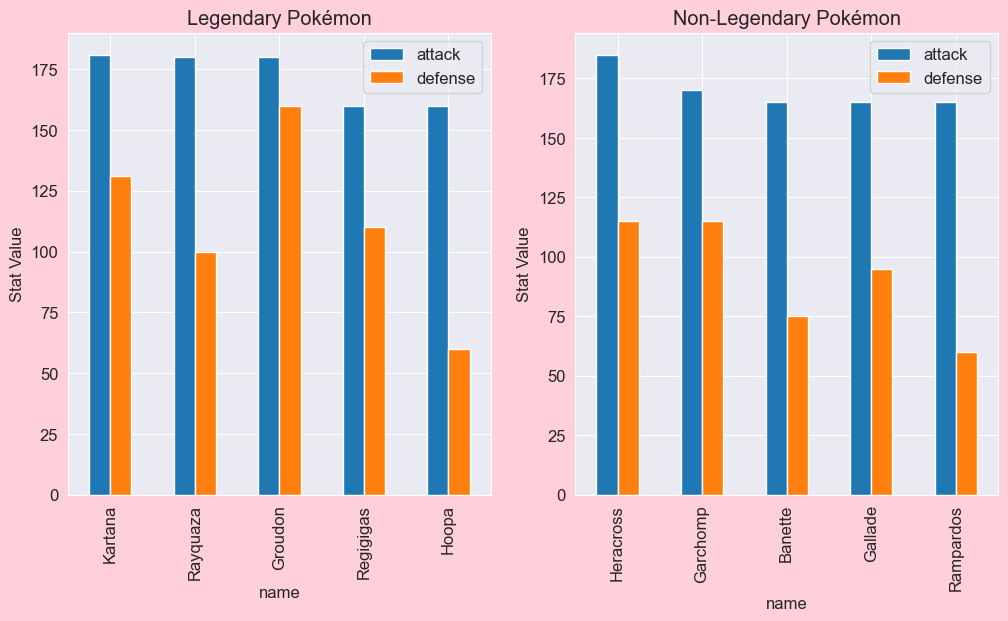

In [69]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2)
legendary_up.plot.bar(x='name', y=['attack', 'defense'], ax=ax1);
non_legendary_up.plot.bar(x='name', y=['attack', 'defense'], ax=ax2);
ax1.set_title('Legendary Pokémon')
ax2.set_title('Non-Legendary Pokémon')
ax1.set_ylabel('Stat Value')
ax2.set_ylabel('Stat Value')

###### There is not much difference between legendary and non-legendary pokemon's but the defense in legendary pokemon is higher than the non-legendary one's.
###### and if we also check the speed of legendary and non legendary pokemon than -

In [70]:
col=df[['name', 'speed', 'legendary_status']]
legendary_pokemon=col.loc[col['legendary_status'] == 'Legendary']
non_legendary_pokemon=col.loc[col['legendary_status'] == 'Non-Legendary']

In [71]:
legendary_up=legendary_pokemon.sort_values(by='speed',ascending=False).head(5)
non_legendary_up=non_legendary_pokemon.sort_values(by='speed',ascending=False).head(5)

<Figure size 1200x600 with 0 Axes>

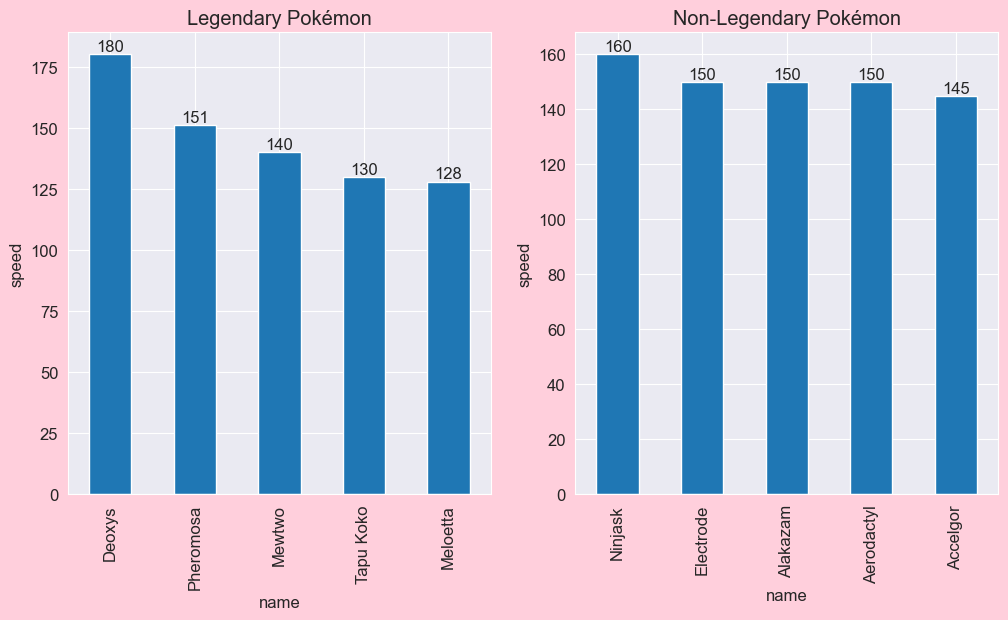

In [72]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2)
legendary_up.plot.bar(x='name', y='speed',legend=False, ax=ax1);
non_legendary_up.plot.bar(x='name', y='speed', ax=ax2, legend=False);
ax1.set_title('Legendary Pokémon')
ax2.set_title('Non-Legendary Pokémon')
ax1.set_ylabel('speed')
ax2.set_ylabel('speed')
for label in ax1.containers:
    ax1.bar_label(label)
for label in ax2.containers:
    ax2.bar_label(label)

## Conclusions

- 91 percent of Pokemon's are non-legendary and only 9 percent of the Pokemon's are legendary. It is ok that only small amount of the pokemon's are legendary.
- There are 55 percent of the Pokemon's are male and 45 percent are female.
- There are 801 Pokemon's in total, and the number of total Pokemon's by each generation are -
                            first_gen      151
                            sec_gen        100
                            third_gen      135
                            fourth_gen     107
                            fifth_gen      156
                            sixth_gen       72
                            seventh_gen     80
                            
- There are total 18 types of element in Pokemon's, and the total Pokemon's in each element are -
                            bug	          72
                            dark	      29
                            dragon	      27
                            electric	  39
                            fairy	      18
                            fighting	  28
                            fire	      52
                            flying	       3
                            ghost	      27
                            grass	      78
                            ground	      32
                            ice	          23
                            normal	      105
                            poison	      32
                            psychic	      53
                            rock	      45
                            steel	      24
                            water	      114
                            
    and normal, water, bug and grass has the highest number of pokemon's.
- Most of the pokemon's has the base happiness 70.
- And most of the pokemon's have flying as their secondary element.
- Levitation is the most common ability.
- 0.8 percent of the Pokemon's have the same second element as their first element.
- Mewtwo and Rayquaza has the highest base total values.
- Aggron, Shuckle and Steelix has the highest defense which is very good against the speed chasers and cleavers. They are very good against high atk pokemon's and if you are lacking speed which is very important because speed decides who will atk first and if your speed is high then you'll take turns faster.
- Pinsir and Beedril has the highest speed but Pinsir has low atk and beedril has atk value of 145 which is great for cleaving.
- Water element is good against fire element, fire element is good against earth element, and earth element is good against water element.
- Shedinja is the only Pokemon in whole game who has 1 hp.Shedinja is a Pokémon resembling a cicada’s shed exoskeleton. It is a dual-type Bug/Ghost Pokémon introduced in Generation III. Most of its body is light brown, but the abdomen is gray. It has four protrusions on its underside instead of legs; the top pair is brown, while the lower is gray. There are round protrusions on the side of its head with narrow slits for eyes. Shedinja is considered a special evolution of Nincada, appearing only when Nincada evolves into Ninjask starting at level 20, if the player has an empty slot in their party and an extra Poké Ball on hand. It is known as the Shed Pokémon and has the ability Wonder Guard.
- Legendary POkemon's has slightly higher stats than non-legendary pokemon's stat, which is ok because the legendary pokemon's are rare and hard to find in compared to non-legendary one's.